#### 임의의 데이터 생성

In [4]:
np.random.normal(0.0,0.9)

-0.7994724693799065

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0,0.9), 
                           np.random.normal(0.0,0.9)])
    else:
        vectors_set.append([np.random.normal(3.0,0.5),
                           np.random.normal(1.0, 0.5)])

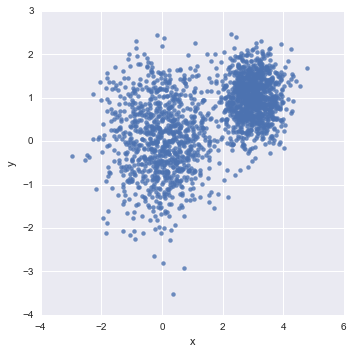

In [14]:
df = pd.DataFrame({"x" : [v[0] for v in vectors_set], "y" : [v[1] for v in vectors_set]})

sns.lmplot("x","y", data=df, fit_reg = False, size=5)
plt.show()

#### K-Means 구현

vector의 차원 : (2000, 2)
centroid의 차원 : (4, 2)
확장된 vector의 차원 : (1, 2000, 2)
확장된 centroid의 차원 : (4, 1, 2)
diff 차원 : Tensor("Sub_15:0", shape=(4, 2000, 2), dtype=float32)
sqr 차원 : Tensor("Square_13:0", shape=(4, 2000, 2), dtype=float32)
distance 차원 : Tensor("Sum_13:0", shape=(4, 2000), dtype=float32)
assignments 차원 : Tensor("ArgMin_13:0", shape=(2000,), dtype=int64)
means 차원 : (4, 2)
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[[ 0.82512134  0.25567791]
 [-0.23930556 -0.86042231]
 [-0.72808433  0.73299968]
 [ 2.99937034  1.0122292 ]]


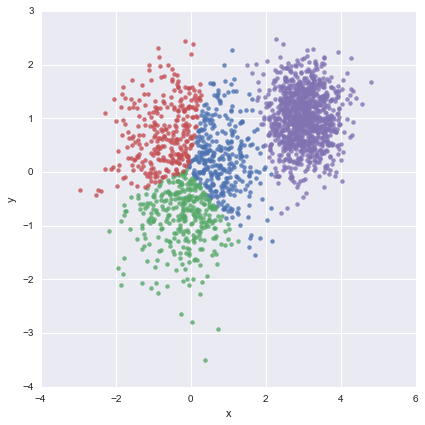

In [26]:
import tensorflow as tf

## 임의 상수 생성
vectors = tf.constant(vectors_set)

## 1. 초기 k 개수 지정 및 중심 지정
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1]))

print ("vector의 차원 : "+str(vectors.get_shape())) # 2000,2
print ("centroid의 차원 : "+str(centroides.get_shape())) # 4,2

## 초기 vector, centroid에 대해 차원 확장
expanded_vectors = tf.expand_dims(vectors,0) # 첫번째 차원 추가
expanded_centroides = tf.expand_dims(centroides, 1) # 두번째 차원 추가

print ("확장된 vector의 차원 : "+str(expanded_vectors.get_shape())) # 1,2000,2
print ("확장된 centroid의 차원 : "+str(expanded_centroides.get_shape())) # 4,1,2

## 2. 할당(유클리드 거리)
# assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2),0)
diff = tf.sub(expanded_vectors, expanded_centroides) # 뺼셈을 하면서 서로의 차원에 맞춰준다(작은쪽이 큰쪽으로)
sqr = tf.square(diff) 
distances = tf.reduce_sum(sqr, 2) # D2의 차원을 줄여줌 4,2000 
assignments = tf.argmin(distances, 0) # D0(4)의 차원을 중심으로 최소값을 리턴

print ("diff 차원 : "+str(diff))
print ("sqr 차원 : "+str(sqr))
print ("distance 차원 : "+str(distances))
print ("assignments 차원 : "+str(assignments))


## 3. centroid 업데이트
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices = [1]) for c in range(k)])

print("means 차원 : "+str(means.get_shape()))
update_centroides = tf.assign(centroides, means)

## 모델 수행
init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op) 

for step in range(100):
    update_centroid, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

print (centroid_values) # 각 군집의 중심값

data = {"x" : [], "y" : [], "cluster" : []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    

df = pd.DataFrame(data)
sns.lmplot("x","y", data=df, fit_reg=False, size=6, hue="cluster", legend=False) # x값 y값에 따라 cluster 된 결과 보여주기
plt.show()